In [151]:
import subprocess
import random

size_db=[400,800,1600,3200,6400,12800,25600,51200,102400,204800]

In [152]:
def generate_database(i,q,c,t):
    j=i+1000
    nbr=0
    db=""
    while(nbr<t):
        if(q==0):
            db=db+f'p({j},{(j+((j+1)%2))},{(j+(j%2))*2}). s({j+((j+1)%2)},0). r({(j+(j%2))*2},{j+3},c). '
        else:
            db=db+f'p({j},{j},{j},{j}).'
        j=j+1
        nbr=nbr+1
    if(not c):
        tmp=random.randint(1,3)
        if(q==0):
            if(tmp==1):
                db=db+f'p({j},{(j*1000)},{(j+(j%2))*2}).'
            elif(tmp==2):
                db=db+f'p({j},{(j+((j+1)%2))},{(j*1000)}).'
            elif(tmp==3):
                db=db+f'r({(j+(j%2))*2},{j+3},d). '
        else:
            if(tmp==1):
                db=db+f'p({j+20000},{j},{j+20000},{j+10000}). p({j},{j},{j},{j}).'
            elif(tmp==2):
                db=db+f'p({j},{j+20000},{j+20000},{j+10000}). p({j},{j},{j},{j}).'
            elif(tmp==3):
                db=db+f'p({j+20000},{j+20000},{j},{j+10000}). p({j},{j},{j},{j}).'
            
    return db

In [153]:
f = open("q0.db", "w")

i=0
q0_datalog=[]
q0_gac=[]
while(i<10):
    line=generate_database(i,0,True,size_db[i])
    f.write(line)
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q0.db',"datalog_query0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if("unsatisfied" in tmp[0]):
            print("Unsatisfied detected")
            break

        result = subprocess.run(['clingo','q0.db',"gac_query0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])
        if("UNSATISFIABLE" in tmp[0]):
            print("Unsatisfied detected")
            break
        j=j+1
    q0_datalog.append(list_d)
    q0_gac.append(list_gac)
        
        
    i=i+1


f.close()

In [154]:
f = open("q0_inconsistent.db", "w")

i=0
q0c_datalog=[]
q0c_gac=[]
while(i<10):
    line=generate_database(i,0,False,size_db[i])
    f.write(line)
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q0_inconsistent.db',"datalog_query0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if(not "unsatisfied" in tmp[0]):
            print("Unsatisfied detected")
            break

        result = subprocess.run(['clingo','q0_inconsistent.db',"gac_query0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])

        if(not "UNSATISFIABLE" in tmp[0]):
            print("Unsatisfied detected")
            break
        j=j+1
    q0c_datalog.append(list_d)
    q0c_gac.append(list_gac)
    
    i=i+1


f.close()

In [155]:
f = open("q1.db", "w")

i=0
q1_datalog=[]
q1_gac=[]
while(i<10):
    line=generate_database(i,1,True,size_db[i])
    f.write(line)
    
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q1.db',"datalog_query1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if("unsatisfied" in tmp[0]):
            print("Unsatisfied detected")
            break

        result = subprocess.run(['clingo','q1.db',"gac_query1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])
        if("UNSATISFIABLE" in tmp[0]):
            print("Unsatisfied detected")
            break
        j=j+1
        
    q1_datalog.append(list_d)
    q1_gac.append(list_gac)
        
    i=i+1


f.close()

In [156]:
f = open("q1_inconsistent.db", "w")

i=0
q1c_datalog=[]
q1c_gac=[]
while(i<10):
    line=generate_database(i,1,False,size_db[i])
    f.write(line)
    
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q1_inconsistent.db',"datalog_query1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if(not "unsatisfied" in tmp[0]):
            print("satisfied detected")
            break

        result = subprocess.run(['clingo','q1_inconsistent.db',"gac_query1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])

        if(not "UNSATISFIABLE" in tmp[0]):
            print("satisfied detected")
            break
        j=j+1
        
    q1c_datalog.append(list_d)
    q1c_gac.append(list_gac)
    
    i=i+1


f.close()

In [157]:
print(q0_datalog)
print(q0_gac)

[['0.000', '0.016', '0.000', '0.016', '0.000'], ['0.000', '0.016', '0.016', '0.016', '0.016'], ['0.016', '0.031', '0.031', '0.047', '0.031'], ['0.094', '0.094', '0.094', '0.094', '0.078'], ['0.172', '0.094', '0.172', '0.109', '0.172'], ['0.219', '0.344', '0.359', '0.344', '0.344'], ['0.453', '0.828', '0.703', '0.469', '0.859'], ['1.484', '1.453', '0.938', '1.453', '1.438'], ['2.922', '2.984', '2.938', '1.906', '1.891'], ['5.938', '5.922', '3.984', '3.875', '5.969']]
[['0.016', '0.016', '0.016', '0.016', '0.016'], ['0.031', '0.031', '0.031', '0.047', '0.031'], ['0.063', '0.063', '0.063', '0.063', '0.078'], ['0.125', '0.172', '0.172', '0.125', '0.172'], ['0.359', '0.266', '0.359', '0.359', '0.266'], ['0.563', '0.547', '0.750', '0.547', '0.750'], ['1.547', '1.547', '1.547', '1.125', '1.188'], ['2.391', '3.125', '3.109', '2.359', '3.125'], ['4.859', '4.828', '4.859', '4.813', '4.875'], ['9.922', '10.031', '10.047', '10.078', '9.922']]


In [158]:
print(q0c_datalog)
print(q0c_gac)

[['0.000', '0.000', '0.016', '0.016', '0.000'], ['0.031', '0.031', '0.016', '0.016', '0.016'], ['0.031', '0.047', '0.047', '0.047', '0.016'], ['0.109', '0.094', '0.109', '0.094', '0.109'], ['0.203', '0.219', '0.203', '0.203', '0.172'], ['0.438', '0.422', '0.438', '0.250', '0.438'], ['0.875', '0.719', '0.828', '0.844', '0.844'], ['1.719', '1.484', '1.703', '1.438', '1.703'], ['1.938', '1.938', '2.953', '3.031', '3.516'], ['6.125', '7.016', '7.000', '6.969', '5.906']]
[['0.016', '0.016', '0.016', '0.016', '0.016'], ['0.016', '0.031', '0.031', '0.047', '0.031'], ['0.078', '0.078', '0.078', '0.063', '0.063'], ['0.156', '0.109', '0.109', '0.109', '0.109'], ['0.219', '0.234', '0.234', '0.234', '0.328'], ['0.469', '0.500', '0.531', '0.531', '0.563'], ['0.969', '0.969', '0.953', '0.984', '1.000'], ['2.063', '1.984', '1.969', '1.969', '2.031'], ['4.125', '4.156', '5.734', '4.063', '4.188'], ['8.328', '8.359', '8.250', '8.297', '11.375']]


In [159]:
print(q1_datalog)
print(q1_gac)

[['0.016', '0.000', '0.016', '0.000', '0.000'], ['0.000', '0.000', '0.000', '0.000', '0.000'], ['0.016', '0.016', '0.016', '0.031', '0.016'], ['0.047', '0.031', '0.047', '0.031', '0.047'], ['0.078', '0.078', '0.078', '0.078', '0.078'], ['0.156', '0.156', '0.078', '0.156', '0.156'], ['0.313', '0.313', '0.313', '0.313', '0.328'], ['0.625', '0.625', '0.641', '0.641', '0.641'], ['1.813', '1.281', '1.313', '1.297', '1.297'], ['2.672', '2.625', '2.641', '2.656', '2.641']]
[['0.000', '0.000', '0.000', '0.000', '0.016'], ['0.016', '0.016', '0.016', '0.016', '0.016'], ['0.016', '0.016', '0.016', '0.016', '0.031'], ['0.031', '0.031', '0.031', '0.031', '0.031'], ['0.063', '0.063', '0.047', '0.063', '0.063'], ['0.109', '0.109', '0.125', '0.125', '0.125'], ['0.266', '0.250', '0.250', '0.250', '0.250'], ['0.500', '0.516', '0.516', '0.516', '0.516'], ['1.031', '1.063', '1.031', '1.047', '1.031'], ['2.156', '2.141', '2.172', '2.172', '2.188']]


In [160]:
print(q1c_datalog)
print(q1c_gac)

[['0.000', '0.000', '0.016', '0.000', '0.000'], ['0.016', '0.016', '0.016', '0.016', '0.016'], ['0.016', '0.016', '0.016', '0.016', '0.016'], ['0.047', '0.047', '0.031', '0.031', '0.047'], ['0.109', '0.078', '0.063', '0.078', '0.078'], ['0.141', '0.094', '0.156', '0.156', '0.141'], ['0.313', '0.313', '0.313', '0.313', '0.313'], ['0.641', '0.641', '0.641', '0.641', '0.641'], ['0.797', '1.313', '1.297', '1.297', '1.313'], ['2.672', '2.641', '2.703', '2.656', '2.641']]
[['0.000', '0.000', '0.000', '0.000', '0.000'], ['0.000', '0.000', '0.000', '0.000', '0.000'], ['0.016', '0.016', '0.016', '0.016', '0.000'], ['0.016', '0.031', '0.031', '0.031', '0.016'], ['0.063', '0.047', '0.063', '0.063', '0.047'], ['0.109', '0.125', '0.109', '0.109', '0.109'], ['0.219', '0.234', '0.234', '0.234', '0.234'], ['0.469', '0.719', '0.453', '0.469', '0.438'], ['0.953', '0.953', '1.453', '0.969', '0.953'], ['1.984', '2.031', '2.953', '1.953', '1.969']]


In [171]:
import matplotlib.pyplot as plt
import numpy as np

In [172]:
mean_q0_datalog=[]
mean_q0_gac=[]

mean_q0c_datalog=[]
mean_q0c_gac=[]

mean_q1_datalog=[]
mean_q1_gac=[]

mean_q1c_datalog=[]
mean_q1c_gac=[]

for i in range(len(q0_datalog)):
    mean_q0_datalog.append(sum(map(float, q0_datalog[i]))/len(q0_datalog[i])*1000)
    mean_q0_gac.append(sum(map(float,q0_gac[i]))/len(q0_gac[i])*1000)
    
    mean_q0c_datalog.append(sum(map(float, q0c_datalog[i]))/len(q0_datalog[i])*1000)
    mean_q0c_gac.append(sum(map(float,q0c_gac[i]))/len(q0_gac[i])*1000)
    
    mean_q1_datalog.append(sum(map(float, q1_datalog[i]))/len(q1_datalog[i])*1000)
    mean_q1_gac.append(sum(map(float,q1_gac[i]))/len(q1_gac[i])*1000)
    
    mean_q1c_datalog.append(sum(map(float, q1c_datalog[i]))/len(q1_datalog[i])*1000)
    mean_q1c_gac.append(sum(map(float,q1c_gac[i]))/len(q1_gac[i])*1000)
    
    
print(mean_q0_datalog)
print(mean_q0_gac)

print(mean_q0c_datalog)
print(mean_q0c_gac)

    
print(mean_q1_datalog)
print(mean_q1_gac)

print(mean_q1c_datalog)
print(mean_q1c_gac)

[6.4, 12.8, 31.2, 90.80000000000001, 143.8, 321.99999999999994, 662.4, 1353.2, 2528.2000000000003, 5137.600000000001]
[16.0, 34.2, 66.0, 153.2, 321.79999999999995, 631.4, 1390.8, 2821.8, 4846.8, 10000.0]
[6.4, 22.0, 37.6, 103.00000000000001, 200.0, 397.2, 821.9999999999999, 1609.4, 2675.2, 6603.199999999999]
[16.0, 31.2, 72.0, 118.39999999999999, 249.8, 518.8000000000001, 975.0, 2003.2000000000005, 4453.2, 8921.8]
[6.4, 0.0, 19.0, 40.6, 78.0, 140.40000000000003, 316.0, 634.6, 1400.1999999999998, 2647.0000000000005]
[3.2, 16.0, 19.0, 31.0, 59.8, 118.6, 253.2, 512.8000000000001, 1040.6, 2165.8]
[3.2, 16.0, 16.0, 40.6, 81.2, 137.6, 313.0, 641.0, 1203.3999999999999, 2662.6000000000004]
[0.0, 0.0, 12.8, 25.0, 56.599999999999994, 112.19999999999999, 231.0, 509.6000000000001, 1056.2, 2178.0]


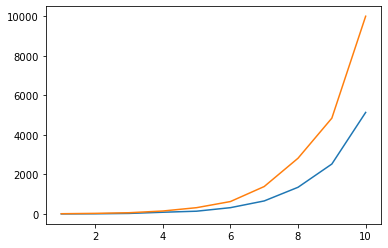

In [173]:
x = np.arange(1, len(size_db)+1)
plt.plot(x, mean_q0_datalog)
plt.plot(x, mean_q0_gac)

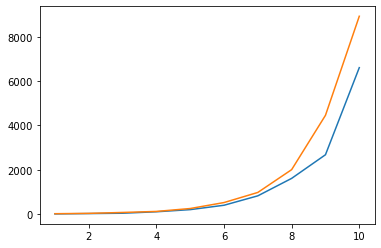

In [174]:
x = np.arange(1, len(size_db)+1)
plt.plot(x, mean_q0c_datalog)
plt.plot(x, mean_q0c_gac)

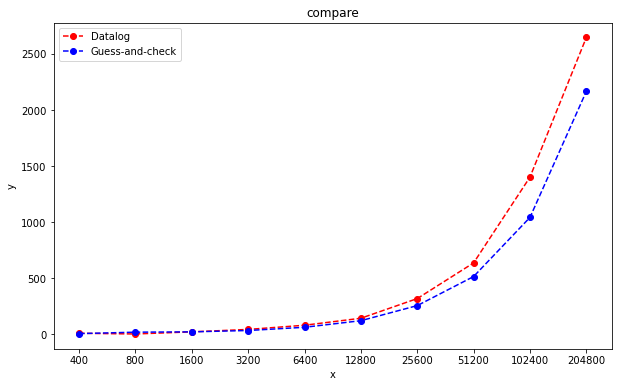

In [189]:
plt.figure(figsize=(10,6))
plt.plot(x, mean_q1_datalog, marker='o', linestyle='--', color='r', label='Datalog') 
plt.plot(x, mean_q1_gac, marker='o', linestyle='--', color='b', label='Guess-and-check') 
plt.xlabel('x')
plt.ylabel('y') 
plt.xticks(x, size_db)
plt.title('compare')
plt.legend() 
plt.show()

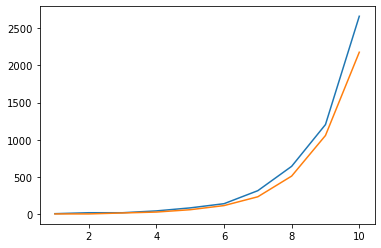

In [176]:
x = np.arange(1, len(size_db)+1)
plt.plot(x, mean_q1c_datalog)
plt.plot(x, mean_q1c_gac)